# Dream Market's Cocaine 

## "Existe un amazon.com oculto dirigido al mundo de las drogas ilegales" 

Esta libreta se basa en un dataset que contine algunas variables interesantes con las cuales se espera obtener un panorama general sobre como se comportan las ventas de drogas ilegales en la dark web.


# Introducción

En la actualidad las compras por internet se han convertido en algo completamente normal para las personas, hasta el punto en el que el mercado se ha convertido en el mundo entero, existen compradores para cualquier producto. Claro que como para aquellos productos que no se pueden comprar en la tiendita de la esquina existe un mercado negro, tambien existe un mercado negro de compras en internet, que va desde comprar (inserte su pensamiento mas bizarro aqui) hasta (otro aun mas bizarro aqui ). 

Dejando de lado sus pensamientos cochinos, en este documento hablaremos en concreto sobre el mundo de las drogas en internet ya que para algunas personas que no viven en México y que para su desgracia no tienen un "tiradero" en cada colonia de la ciudad abierto las 24 horas del dia, los 365 dias de la semana, existe aun una solucion.

#### Comprar drogas por internet.

Comprar drogas por internet es algo bastante serio, principalmente por que mantener el anonimato es algo imprescindible en el mundo virtual, tanto por el lado de los compradores como por el de los vendedores, asi que uno pensaria que es un poco dificil 
hacer este tipo de compras y la verdad es que si lo es, pero una vez dentro ¿Que es lo que a uno le espera? ¿cuanto podre comprar? ¿con que voy a pagar para que no me rastreen? ¿cuanto me va a costar? y un monton de pregunas mas.
Para comprender un poco mejor como funciona esto, usaremos el siguiente dataset: https://www.kaggle.com/everling/cocaine-listings que contiene informacion de aproximadamente 1400 productos, colectado mediante una tecnica de gathering llamada web-scraping, en el año 2017.







##  Datos del sitio web


In [228]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas
from mpl_toolkits.mplot3d import Axes3D

## Resumen de los datos que contiene el archivo "coca.csv"

In [229]:
coca_datos = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv
clustcoca = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv este dataset tiene solo las columnas que considero importantes para este doc.
coca_datos.head(10)

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.025770,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.025750,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.032980,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.041200,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.034000,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
5,42,** 10 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,10.0,87.0,0.27050,0.027050,0.031092,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
6,43,** 2 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,2.0,87.0,0.06230,0.031150,0.035805,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
7,44,** 3 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,3.0,87.0,0.08900,0.029667,0.034100,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
8,45,** 5 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,5.0,87.0,0.14170,0.028340,0.032575,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
9,57,***** 0.5 gm uk to uk sociable cocaine 75%,GB → GB,0.5,75.0,0.01173,0.023460,0.031280,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [230]:
clustcoca.drop(['product_title', 'vendor_name', 'vendor_link','product_link','ships_from_to','ships_from',
               'ships_to_SE','ships_to_CO','ships_to_CN','ships_to_PL','ships_from_PL','ships_to_GR','ships_to_CH',
               'ships_from_CH','ships_to_BR','ships_from_BR','ships_to_CZ','ships_from_CZ','ships_from_SE','ships_from_CO',
               'ships_from_CN','ships_from_GR','ships_from_S. America','ships_to_S. America','ships_from_DK','ships_to_DK',
               'ships_from_IT','ships_to_IT','ships_from_SI','ships_to_SI','ships_from_WW','ships_to_WW','ships_from_BE',
               'ships_to_BE','ships_from_N. America','ships_to_N. America','ships_from_ES','ships_from_EU','ships_from_AU',
               'ships_to_AU','ships_to_ES','ships_to_EU','ships_from_DE','ships_to_DE','ships_from_CA','ships_to_CA',
               'ships_from_GB','ships_to_GB','ships_from_FR','ships_to_FR','ships_from_NL','ships_to_NL','ships_from_US',
               'ships_to_US','ships_to','Unnamed: 0'], axis=1,inplace=True)#eliminando aquellas variables con las que no puedo hacer predicción. 


In [231]:
coca_datos.columns # mostrando todas las columnas de nuestro dataset sin limpiar


Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

In [232]:
clustcoca.columns # mostrando columnas restantes despues de eliminar aquellas con variables categoricas

Index(['grams', 'quality', 'btc_price', 'cost_per_gram', 'cost_per_gram_pure',
       'escrow', 'successful_transactions', 'rating'],
      dtype='object')

### Descripción de las variables 

Con el resumen de los datos podemos darnos una pequeña idea de lo que trata este conjunto de datos.

- Imaginense que son ustedes los que estan buscando comprar cocaina por internet, ¿que criterio utilizarian 
para realizar su compra?.<br>

En el dataset se pueden encontrar variables tanto categoricas como cuantitativas pero, son las cuantitativas 
las que parecen describir mejor la tendencia de los datos y por lo tanto el comportamiento de compradores de cocaina en la dark web. <br>




  
#### 'product_title'
contiene un resumen de lo que buscas (si es pura, la calidad, el costo) no en todos los casos 
#### 'ships_from_to'
(de donde viene y a donde se envia)
#### 'grams'
(la cantidad de gramos que un vendedor manda)
algunos vendedores se anuncian como "0.5G COCAINE 89% "  y otros "10 Gram 87% Pure Uncut Colombian Cocaine" como que no dejan lugar a que tu puedas comprar lo que te de la gana. 
#### 'quality'
La calidad de la cocaina que venden, como ejemplo, la denominada "Yen” es más pura (roza el 98%) y más blanca, escamosa y brillante. Ahora bien, existen otros tipos de cocaína en polvo con menos pureza, en la que su presentación es más polvorienta y con menor brillo. Esto ocurre porque para su comercialización se añaden una serie de sustancias químicas que pueden ser altamente tóxicas. Cuantas menos sustancias incorpore más pura es la coca y es considerada de mayor calidad.
#### 'btc_price'
el precio en bitcoins del producto que venden
#### 'cost_per_gram'
costo por gramo de coca no pura 
#### 'cost_per_gram_pure'
costo por gramo de coca pura
#### 'product_link'
el enlace hacia el producto
#### 'vendor_link'
enlace del vendedor 
#### 'vendor_name'
nombre del vendedor
#### 'successful_transactions'
numero de transacciones exitosas
#### 'rating'
rating del vendedor 


    

## Primera observación

Con solo leer las etiquetas del dataset es facil hacerse una idea, mejor dicho muchas ideas del comportamiento de los datos.<br>
Como ejemplo yo podria crear una hipotesis que se base directamente en la calidad de la cocaina, es decir que la calidad desde mi punto de vista deberia estar relacionada con diferentes variables de la siguiente forma:

- mayor calidad implica mayor precio
- mayor calidad implica correlación con la variable cost_per_gram
- mayor calidad implica correlación con la variable cost_per_gram_pure
- mayor calidad implica correlación con la variable rating 

El objetivo es utilizar las tecnicas de visualizacion de datos, no necesariamente para respaldar nuestra hipotesis (al menos no tan rapido), la idea es crear una hipotesis basados directamente en la informacion de nuestro dataset y no en nuestro criterio de organización o forma de pensar que muchas veces termina sesgando los datos a nuestra conveniencia.







## La forma de los datos

Es importante ver la distribución de los datos para darnos una idea de los problemas que nos pueden dar si no son tratados correctamente, conocer su comportamiento siempre es algo que beneficia bastante.

In [264]:
#g = sns.catplot(x="ships_from", y="cost_per_gram",data=coca_datos, kind="box")
#g.fig.set_size_inches(18,9)

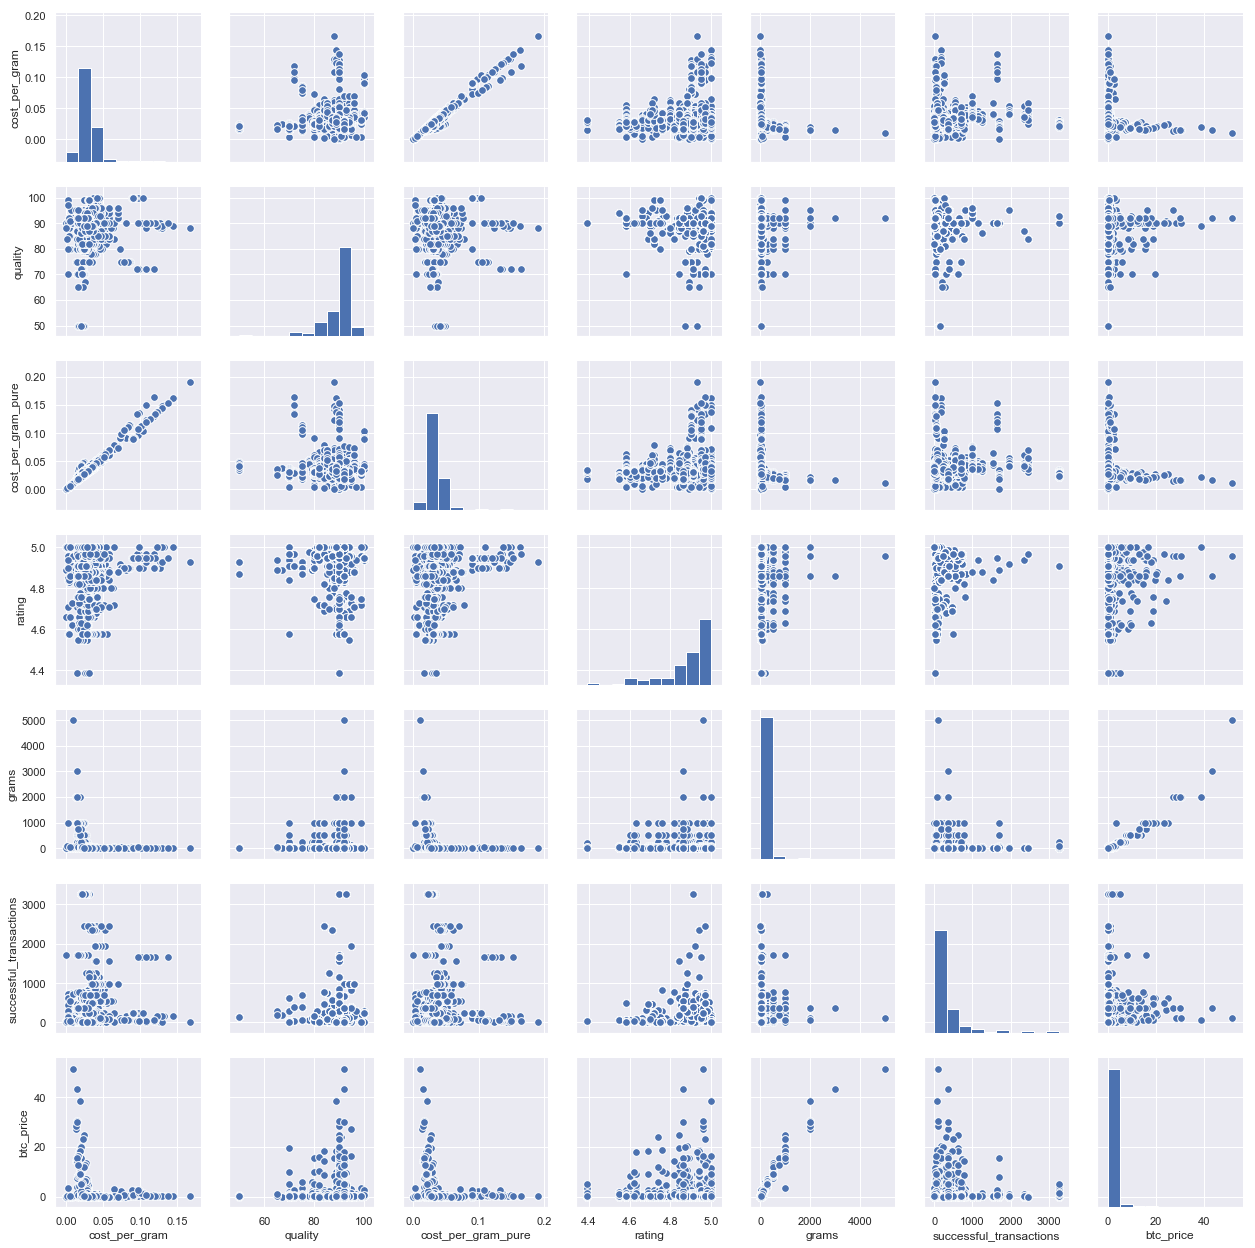

In [233]:
g = sns.PairGrid(clustcoca, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)


In [234]:
clustcoca.corr()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
grams,1.000000,0.030695,0.960451,-0.178628,-0.178273,-0.148276,-0.012006,0.009282
quality,0.030695,1.000000,0.027096,0.082540,-0.064907,0.031008,0.053754,-0.055191
btc_price,0.960451,0.027096,1.000000,-0.171318,-0.170636,-0.159067,-0.008213,0.000539
cost_per_gram,-0.178628,0.082540,-0.171318,1.000000,0.985784,-0.170052,0.063822,0.121977
cost_per_gram_pure,-0.178273,-0.064907,-0.170636,0.985784,1.000000,-0.170629,0.051564,0.126917
escrow,-0.148276,0.031008,-0.159067,-0.170052,-0.170629,1.000000,-0.029527,-0.037400
successful_transactions,-0.012006,0.053754,-0.008213,0.063822,0.051564,-0.029527,1.000000,0.062433
rating,0.009282,-0.055191,0.000539,0.121977,0.126917,-0.037400,0.062433,1.000000


## Comportamiento de nuestros datos

De la grafica de distribuciónes de nuestros datos y la tabla de correlaciónes, podriamos crear hipotesis mas realistas
y respaldadas directamente con la información del dataset.

- Calidad <br>
como se habia planteado en la primera observación se decia que la calidad mantenia una relacion estrecha con todas las demas
variables, pero no ha resultado como se pensaba. Por relacion estrecha mas que nada me referia a una correlacion positiva ya que uno espera que por ejemplo entre mayor calidad el rating sea mas alto. Claro que tienen una relacion entre ellas pero no es una relacion lineal como esperaba, puede ser una relacion cuadratica, logaritmica o quien sabe de que tipo, ya que nuestros datos se ven afectados por otras variables y en dos dimensiones solo podemos ver una pequeña idea de la relacion entre ellas. 


## Factores que influyen en el precio de la cocaina 


### Anomalías 
como podemos observar en el diagrama de correlacion e histogramas existen datos que a simple vista parecer bastante raros como es el caso de la variable "btc_price" y la variable "grams" que se encuentran correlacionados de forma positiva y se aprecia cierta relacion podria decirse lineal entre ellas. 






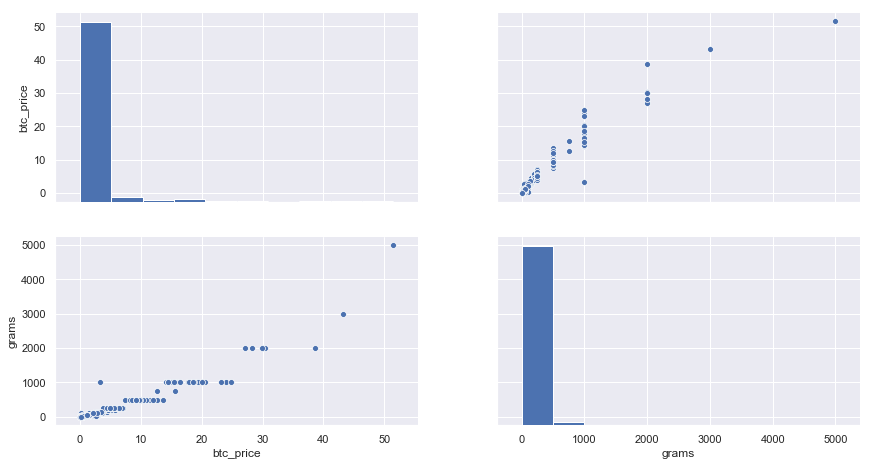

In [235]:
g=sns.pairplot(clustcoca, vars=["btc_price", "grams"])
g.fig.set_size_inches(14,7)


### variable btc_price

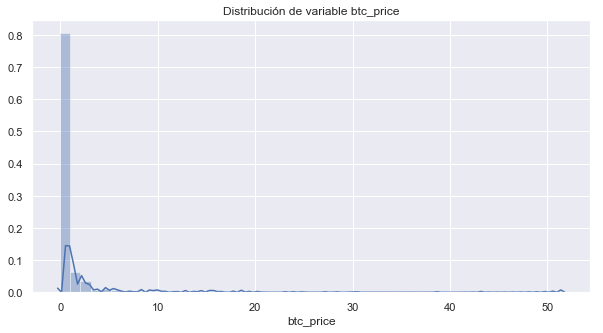

In [236]:
plt.figure(figsize=(10, 5))
plt.title('Distribución de variable btc_price')
sns.distplot (coca_datos['btc_price'])


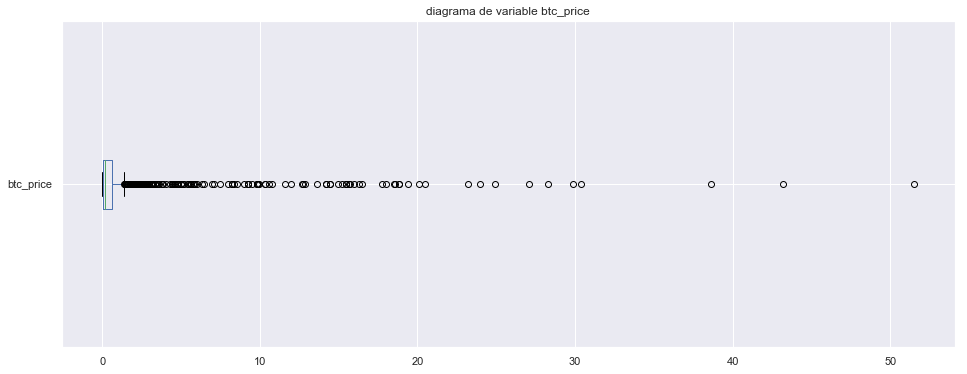

In [237]:

plt.figure(figsize=(16, 6))
plt.title('diagrama de variable btc_price')
coca_datos.boxplot(column=['btc_price'], grid = True,vert=False)


In [238]:
coca_datos.nlargest(100, ['btc_price']) 


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
1033,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.500,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1499,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.200,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1215,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.600,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
745,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.400,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1498,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.890,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
744,2025,2KG Bolivian Cocaine 90%,"EU → EU, WW",2000.0,90.0,28.300,0.014150,0.015722,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
541,1529,2 KG BRICK COCAINE 95% SHIPPED FROM USA,US → US,2000.0,95.0,27.100,0.013550,0.014263,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
466,1311,1KG Pure Uncut Cocaine 90%-92%,"NL → WW, EU",1000.0,90.0,24.890,0.024890,0.027656,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
465,1310,1KG PURE COCAINE 89-91% ******LIMITED TIME DI,NL → WW,1000.0,91.0,23.980,0.023980,0.026352,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
469,1314,1KG COCAINE (Peru)AAA+++ 90% Flakes Fishscale,"DE → WW, DE",1000.0,90.0,23.190,0.023190,0.025767,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [222]:
coca_datos["btc_price"].mode() # cantidad que mas se

0    0.0309
dtype: float64

In [224]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (coca_datos['grams'].value_counts())
  


1.00    196
2.00    116
0.50     88
2.50     17
0.20     13
0.25     12
1.50     11
0.30      5
0.10      4
0.12      2
0.60      1
0.40      1
0.35      1
1.20      1
0.45      1
0.75      1
Name: grams, dtype: int64


### Explicación de variable btc_price y grams

como podemos observar en la distribución de la variables y principalmente en el diagrama de caja de btc_price tenemos bastantes valores atipicos originados principalmente por cantidades fuera de lo "normal" que se venden en el sitio. <br>
Como se puede observar la cantidad que mas se vende es 1 gramo pero ya no estamos hablando de gramos, todos esos valores atipicos pertenecen a personas que han decidido vender kilos, Como se puede apreciar en el resumen, el maximo que se publica es 5 kg (variable grams) y ya que los gramos y el btc_price estan correlacionados, el precio se dispara a 51.5 btc.

  


### Eliminando valores atipicos 

In [225]:
dropcoca = coca_datos[ coca_datos['grams'] >= 50.0 ].index
coca_datos.drop(dropcoca , inplace=True)

In [226]:
coca_datos.nlargest(5, ['grams']) 


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR,coca_pred,RSE
560,1584,2.5 GR 88% (tested) uncut clean Flake COCAINE!!,DE → WW,2.5,88.0,0.1236,0.04944,0.056182,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,0.054322,0.000024
561,1593,2.5 gr Uncut Cocaine 90% ***Top quality***Free...,BE → WW,2.5,90.0,0.0677,0.02708,0.030089,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,0.034015,0.000048
562,1594,2.5 gr Uncut Colombian cocaine 89% purity,DE → WW,2.5,89.0,0.0865,0.03460,0.038876,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,0.040854,0.000039
563,1595,2.5 gram Uncut Cocaine 86%,NL → WW,2.5,86.0,0.0643,0.02572,0.029907,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,0.033873,0.000066
564,1598,2.5G Colombian Fishcale Cocaine 92%,"DE → WW, US",2.5,92.0,0.0901,0.03604,0.039174,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,0.041086,0.000025


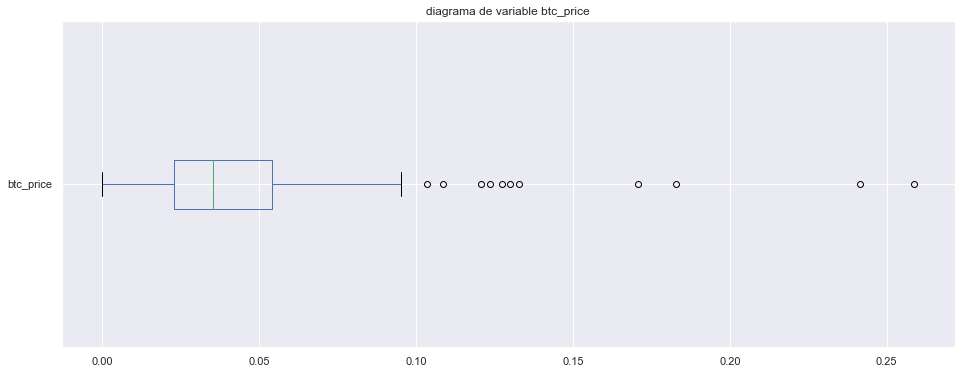

In [151]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable btc_price')
coca_datos.boxplot(column=['btc_price'], grid = True,vert=False)

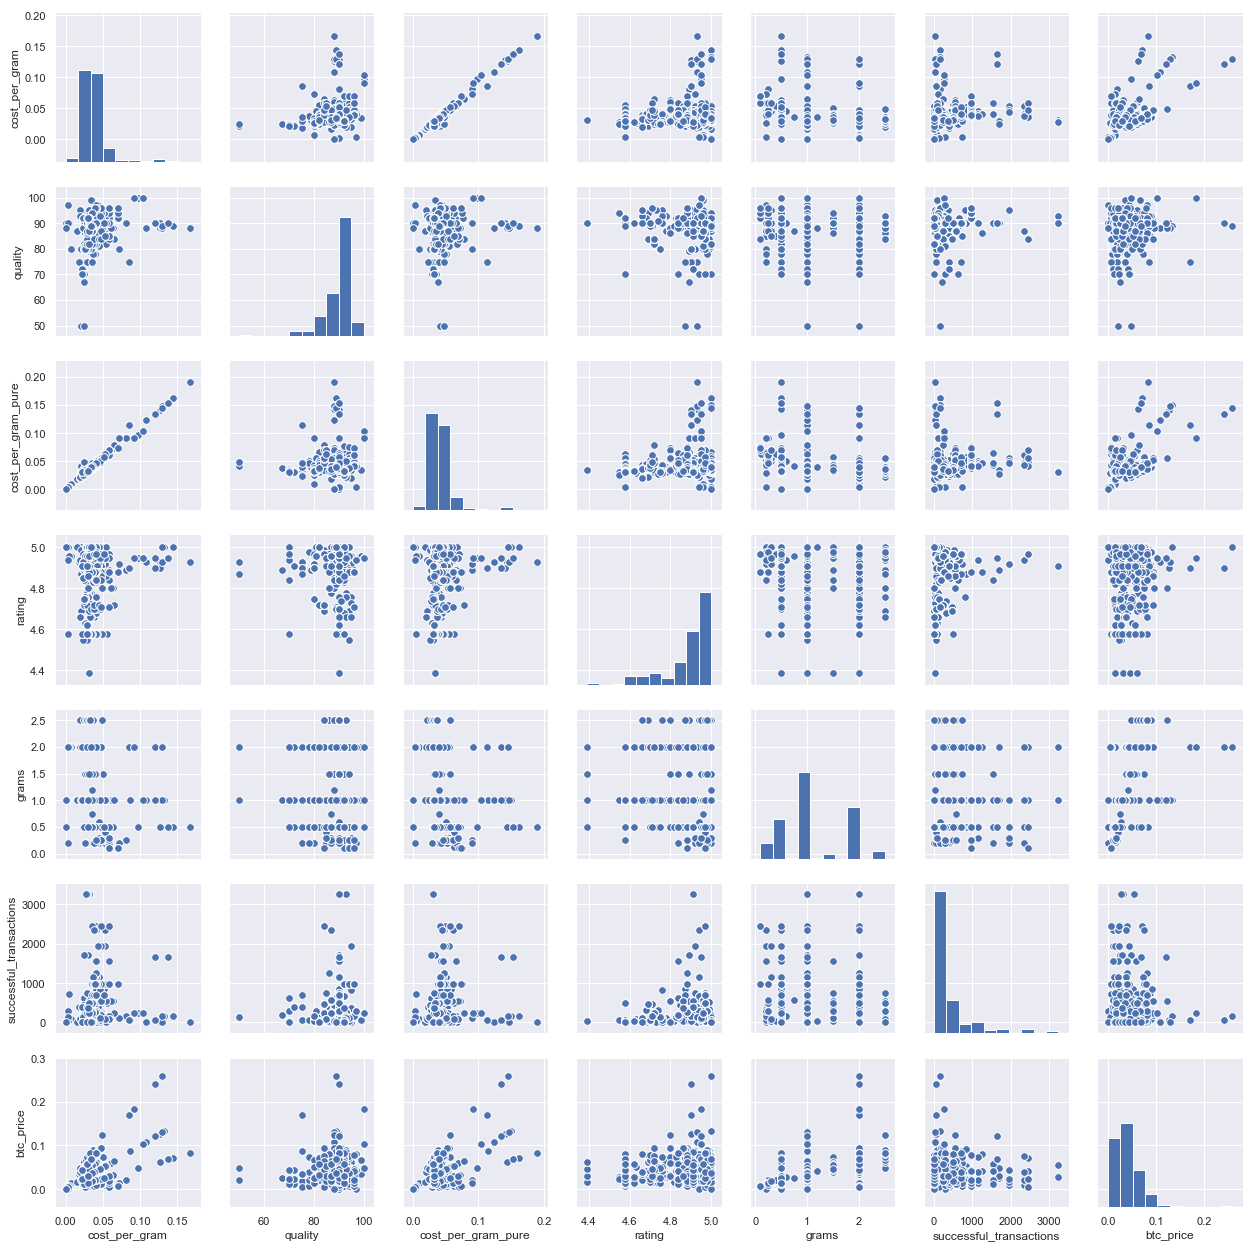

In [152]:
g = sns.PairGrid(coca_datos, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)

skewness grams = 0.45137459235497196
kurtosis grams = -0.9292440127047241


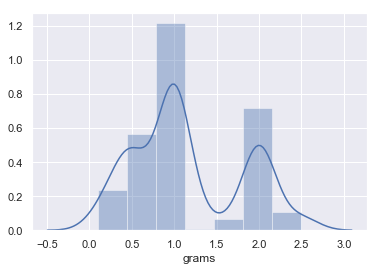

In [158]:
#### forma de las variables

sns.distplot (coca_datos['grams'])
scpg=coca_datos['grams'].skew()
kcpg=coca_datos['grams'].kurt()
print ("skewness grams =",scpg)
print ("kurtosis grams =",kcpg)


In [157]:
import plotly.express as px

fig = px.scatter_3d(coca_datos, x='grams', y='btc_price', z='grams',
              color='grams', size='grams', size_max=18,
              symbol='grams', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [265]:
import plotly.express as px

fig = px.scatter_3d(coca_datos, x='cost_per_gram', y='cost_per_gram_pure', z='cost_per_gram',
              color='cost_per_gram', size='cost_per_gram', size_max=18,
              symbol='cost_per_gram', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

skewness cost_per_Gram = 3.166487815972794
kurtosis cost_per_Gram = 14.158230954131994


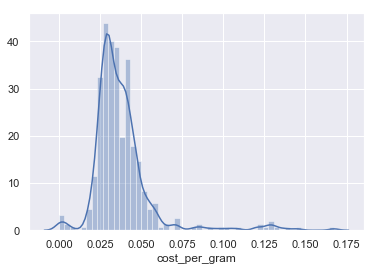

In [159]:
#### forma de las variables

sns.distplot (coca_datos['cost_per_gram'])
scpg=coca_datos['cost_per_gram'].skew()
kcpg=coca_datos['cost_per_gram'].kurt()
print ("skewness cost_per_Gram =",scpg)
print ("kurtosis cost_per_Gram =",kcpg)


skewness cost_per_gram_pure = 3.2445399978327063
kurtosis cost_per_gram_pure = 14.704543882788549


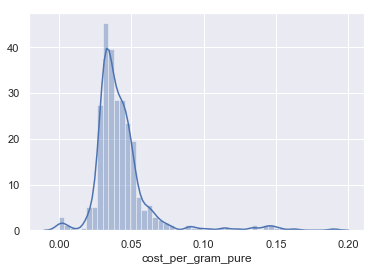

In [160]:

sns.distplot (coca_datos['cost_per_gram_pure'])
scpg=coca_datos['cost_per_gram_pure'].skew()
kcpg=coca_datos['cost_per_gram_pure'].kurt()
print ("skewness cost_per_gram_pure =",scpg)
print ("kurtosis cost_per_gram_pure =",kcpg)

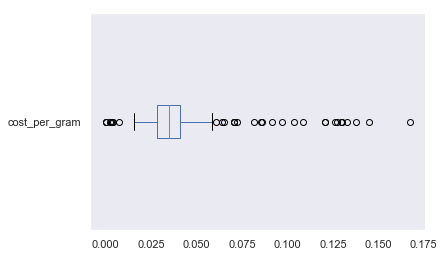

In [161]:
coca_datos.boxplot(column=['cost_per_gram'], grid = False,vert=False)

In [163]:

#coca_datos.nlargest(, ['cost_per_gram']) 



In [91]:
#cpgout= coca_datos['cost_per_gram']

#sns.scatterplot(x=coca_datos['cost_per_gram'], y=coca_datos['cost_per_gram_pure'])

1.0340801332741978

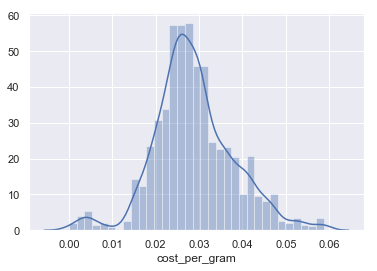

In [10]:
#cout=cpgout[cpgout<=.06 ]
#sns.distplot (cout)
#cout.kurt()


In [92]:

#cout2=cout[cout>=.01]
#sns.distplot(cout2)
#cout2.kurt()

NameError: name 'cout' is not defined

In [164]:
#coca_datos = coca_datos.drop(columns="rating")

coca_datos

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.00,90.0,0.02577,0.025770,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.00,90.0,0.05150,0.025750,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.50,89.0,0.01649,0.032980,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.00,89.0,0.04120,0.041200,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.00,87.0,0.03400,0.034000,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
6,43,** 2 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,2.00,87.0,0.06230,0.031150,0.035805,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
9,57,***** 0.5 gm uk to uk sociable cocaine 75%,GB → GB,0.50,75.0,0.01173,0.023460,0.031280,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
10,58,***** 1 gm uk to uk sociable cocaine 75% pure,GB → GB,1.00,75.0,0.01937,0.019370,0.025827,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
12,60,***** 1gram uk to uk pure perivian flake 95%,GB → GB,1.00,95.0,0.03228,0.032280,0.033979,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
13,61,***** 2 gm uk to uk sociable cocaine 75% pure,GB → GB,2.00,75.0,0.03520,0.017600,0.023467,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#cout2.boxplot( grid = False,vert=False)

#dropcoca = coca_datos[ coca_datos['cost_per_gram'] <= .06 ].index
#coca_datos.drop(dropcoca , inplace=True)
#coca_datos

In [15]:
#dropcoca = coca_datos[ coca_datos['cost_per_gram'] <= .01 ].index
#coca_datos.drop(dropcoca , inplace=True)
#coca_datos

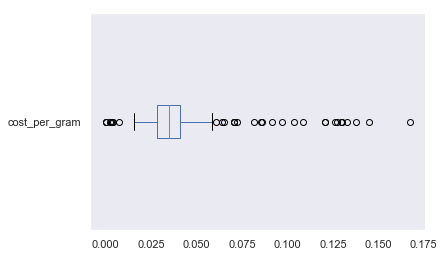

In [165]:

coca_datos.boxplot(column=['cost_per_gram'], grid = False,vert=False)
#coca_datos.boxplot(column=['cost_per_gram_pure'], grid = False,vert=False)

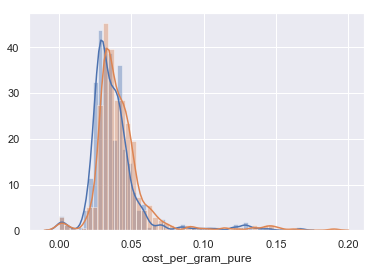

In [166]:
sns.distplot (coca_datos['cost_per_gram'])
sns.distplot (coca_datos['cost_per_gram_pure'])


In [168]:
#coca_datos.corr()

In [19]:
#sns.distplot (coca_datos['rating'])

### Formando el primer modelo de regresion con una variable

El costo de la cocaina  por gramo deberia estar relacionada con el costo por gramo puro
ya que de la pura como explicaba en la variable calidad se extrae la cocaina cortada, entonces podriamos tratar de predecir el precio de la coca en funcion de la cocaina pura.

es decir entre mayor sea el costo por gramo (puro), mayor deberia ser el costo por gramo cortado

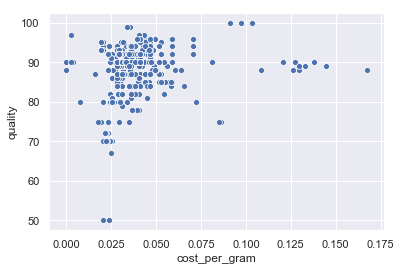

In [169]:
#sns.scatterplot(x=coca_datos['cost_per_gram'], y=coca_datos['cost_per_gram_pure'])
sns.scatterplot(x=coca_datos['cost_per_gram'], y=coca_datos['quality'])

In [170]:
lm = smf.ols ( formula = "cost_per_gram ~ cost_per_gram_pure", data = coca_datos).fit()
#lm = smf.ols ( formula = "cost_per_gram ~ rating", data = coca_datos).fit()

In [171]:
lm.params

Intercept            -0.000022
cost_per_gram_pure    0.886894
dtype: float64

el modelo lineal predictivo seria

costo = 0.020108+0.711129*cost_per_gram_pure



In [172]:
lm.pvalues

Intercept             0.936072
cost_per_gram_pure    0.000000
dtype: float64

In [173]:
lm.rsquared

0.9809330540840386

In [174]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.408e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:12:04   Log-Likelihood:                 2125.5
No. Observations:                 470   AIC:                            -4247.
Df Residuals:                     468   BIC:                            -4239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -2.2e-05      0.000     -0.080      0.936      -0.001       0.001
cost_per_gram_pure     0.8869      0.006    155.168      0.000       0.876       0.898
==============================================================================
Omnibus:                      267.962   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4275.885
Skew:                          -2.109   Prob(JB):                         0.00
Kurtosis:                      17.162   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
coca_pred=lm.predict(pd.DataFrame(coca_datos["cost_per_gram_pure"]))
#coca_pred=lm.predict(pd.DataFrame(coca_datos["rating"]))

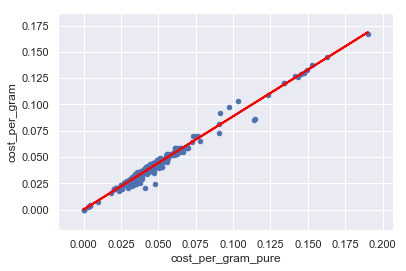

In [176]:
coca_datos.plot(kind="scatter",x="cost_per_gram_pure", y="cost_per_gram")
plt.plot(pd.DataFrame(coca_datos["cost_per_gram_pure"]),coca_pred, c="red", linewidth=2)

#coca_datos.plot(kind="scatter",x="rating", y="cost_per_gram")
#plt.plot(pd.DataFrame(coca_datos["rating"]),coca_pred, c="red", linewidth=2)

In [177]:
coca_datos["coca_pred"]= 0.010598+ 0.778261*coca_datos["cost_per_gram_pure"]
coca_datos["RSE"]=(coca_datos["cost_per_gram"] - coca_datos["coca_pred"])**2

#coca_datos["coca_pred"]= -0.972627 +  0.217667*coca_datos["cost_per_gram_pure"]
#coca_datos["RSE"]=(coca_datos["cost_per_gram"] - coca_datos["coca_pred"])**2

In [178]:
SSD = sum (coca_datos["RSE"])
SSD

0.02239656220424189

In [179]:
RSE = np.sqrt (SSD/(len(coca_datos)-2))
RSE

0.006917796046850181

In [180]:
cpgmean = np.mean(coca_datos["cost_per_gram"])
cpgmean

0.03810090649153184

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.31843487, -0.21843487, -0.11843487, -0.01843487,  0.08156513,
         0.18156513,  0.28156513,  0.38156513,  0.48156513,  0.58156513,
         0.68156513]),
 <a list of 10 Patch objects>)

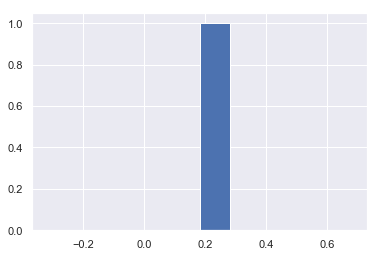

In [181]:
error = RSE/cpgmean
error
plt.hist(error)

(array([  2.,   0.,   9.,  35., 227., 167.,  14.,   5.,   7.,   4.]),
 array([-0.02398235, -0.02035114, -0.01671992, -0.0130887 , -0.00945749,
        -0.00582627, -0.00219505,  0.00143616,  0.00506738,  0.0086986 ,
         0.01232981]),
 <a list of 10 Patch objects>)

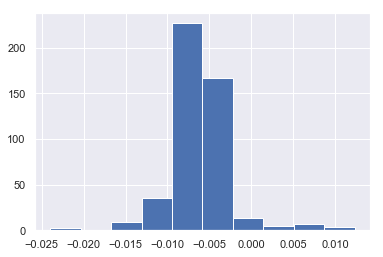

In [182]:
plt.hist((coca_datos["cost_per_gram"] - coca_datos["coca_pred"]))

# regresion multiple 
precio de la coca normal en funcion de el rating y costo por gram puro a

In [183]:
lm2 = smf.ols(formula = "cost_per_gram ~ cost_per_gram_pure+rating", data=coca_datos).fit()

In [184]:
lm2.params

Intercept             0.000831
cost_per_gram_pure    0.887008
rating               -0.000176
dtype: float64

In [185]:
lm2.rsquared

0.9809342280282799

In [186]:
coca_preds=lm2.predict(coca_datos[["cost_per_gram_pure","rating"]])

In [187]:
coca_preds

0       0.025416
1       0.025396
2       0.032833
3       0.041015
4       0.034656
6       0.031751
9       0.027711
10      0.022874
12      0.030105
13      0.020781
15      0.028723
20      0.034618
25      0.027845
29      0.036414
34      0.019446
35      0.019446
42      0.048283
43      0.042961
46      0.045674
47      0.041604
49      0.080237
50      0.042652
51      0.044523
52      0.043560
53      0.043560
54      0.057924
55      0.127372
56      0.168698
57      0.040454
58      0.008243
          ...   
1418    0.035498
1419    0.035504
1420    0.035508
1421    0.031418
1422    0.030412
1433    0.044122
1434    0.029764
1437    0.029745
1439    0.029745
1444    0.035496
1445    0.030378
1449    0.030411
1450    0.032441
1453    0.032973
1466    0.036725
1467    0.031464
1468    0.028813
1472    0.031464
1473    0.050754
1475    0.038001
1476    0.040564
1478    0.030945
1479    0.028816
1481    0.028665
1482    0.028373
1483    0.035902
1485    0.027841
1486    0.0276

In [188]:
SSD= sum((coca_datos["cost_per_gram"]-coca_preds)**2)

In [189]:
SSD

0.003247751138027782

In [190]:
RSE = np.sqrt(SSD/(len(coca_datos)-2-1))

In [191]:
RSE

0.0026371384538736095

In [192]:
error2=RSE/cpgmean

In [193]:
error2

0.06921458560204413

In [194]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.201e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:13:33   Log-Likelihood:                 2125.5
No. Observations:                 470   AIC:                            -4245.
Df Residuals:                     467   BIC:                            -4233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0008      0.005      0.165      0.869      -0.009       0.011
cost_per_gram_pure     0.8870      0.006    153.964      0.000       0.876       0.898
rating                -0.0002      0.001     -0.170      0.865      -0.002       0.002
==============================================================================
Omnibus:                      268.020   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4280.711
Skew:                          -2.109   Prob(JB):                         0.00
Kurtosis:                      17.170   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# validacion del modelo 

(array([  4.,  13.,  24.,  62., 100.,  95.,  85.,  51.,  26.,  10.]),
 array([-3.07186867, -2.50746525, -1.94306183, -1.37865841, -0.81425499,
        -0.24985157,  0.31455185,  0.87895527,  1.44335869,  2.00776211,
         2.57216553]),
 <a list of 10 Patch objects>)

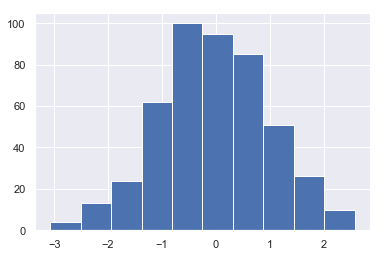

In [195]:
a = np.random.randn(len(coca_datos))
plt.hist(a)

In [196]:
check = (a<0.8)
training =coca_datos[check]#conjunto de entrenamiento 80%
testing =coca_datos[~check]#conjunto de testing 20%

In [197]:
lm= smf.ols(formula ="cost_per_gram ~ cost_per_gram_pure+rating", data=training).fit()

In [198]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     7532.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          7.06e-300
Time:                        02:13:50   Log-Likelihood:                 1683.4
No. Observations:                 372   AIC:                            -3361.
Df Residuals:                     369   BIC:                            -3349.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0016      0.006     -0.275      0.784      -0.013       0.010
cost_per_gram_pure     0.8895      0.007    121.621      0.000       0.875       0.904
rating                 0.0003      0.001      0.245      0.807      -0.002       0.003
==============================================================================
Omnibus:                      178.120   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2326.175
Skew:                          -1.661   Prob(JB):                         0.00
Kurtosis:                      14.791   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

validacion con el conjunto de testing 

In [199]:
c_pred = lm.predict(testing)
c_pred

34      0.019276
56      0.169066
61      0.003679
82      0.040557
88      0.080351
91      0.044331
99      0.064305
100     0.031951
101     0.030256
106     0.043952
110     0.044762
111     0.044684
112     0.026501
121    -0.000119
140     0.144597
141     0.030405
142     0.029294
144     0.026326
147     0.044528
153     0.029713
154     0.037924
156     0.061272
157     0.027839
168     0.026876
174     0.029382
180     0.033270
183     0.030412
188     0.026049
193     0.026511
200     0.041828
          ...   
769     0.033617
770     0.023228
1145    0.028841
1177    0.039556
1188    0.035891
1200    0.040427
1204    0.040592
1209    0.041474
1221    0.037985
1225    0.049403
1228    0.069047
1230    0.054086
1249    0.033066
1250    0.029642
1274    0.038057
1299    0.047174
1330    0.037910
1371    0.061252
1372    0.061182
1373    0.028903
1391    0.026401
1409    0.119154
1434    0.029767
1437    0.029748
1449    0.030406
1453    0.032976
1475    0.038013
1486    0.0275

In [200]:
SSD = sum ((testing["cost_per_gram"]-c_pred)**2)
SSD

0.0006953077112427573

In [201]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

0.0027053703146514797

In [202]:
cpgmm=np.mean(testing["cost_per_gram"])
error = RSE/cpgmm
error

0.06559273475331706

# regresion con scikit learn

In [212]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
feature_cols = ["cost_per_gram_pure","rating","btc_price","quality","successful_transactions","grams"]

In [206]:
x=coca_datos[feature_cols]
y=coca_datos["cost_per_gram"]

In [207]:
estimator = SVR (kernel ="linear")
selector = RFE (estimator,2,step=1)
selector = selector.fit (x,y)

In [208]:
selector.support_

array([False, False, False, False,  True,  True])

In [209]:
selector.ranking_

array([5, 4, 3, 2, 1, 1])

In [60]:
from sklearn.linear_model import LinearRegression

In [210]:
x_pred = x[["quality","successful_transactions"]]

In [213]:
lm= LinearRegression()
lm.fit(x_pred,y)

NameError: name 'LinearRegression' is not defined

In [214]:
lm.intercept_

AttributeError: 'OLSResults' object has no attribute 'intercept_'

In [64]:
lm.coef_

array([ 2.62580186e-04, -1.20447883e-06])

In [65]:
lm.score(x_pred,y)

0.007799427993949948

# clustering 

(array([ 98., 971., 357.,  34.,   8.,  15.,   7.,  11.,   2.,   1.]),
 array([4.51000000e-07, 1.67404059e-02, 3.34803608e-02, 5.02203157e-02,
        6.69602706e-02, 8.37002255e-02, 1.00440180e-01, 1.17180135e-01,
        1.33920090e-01, 1.50660045e-01, 1.67400000e-01]),
 <a list of 10 Patch objects>)

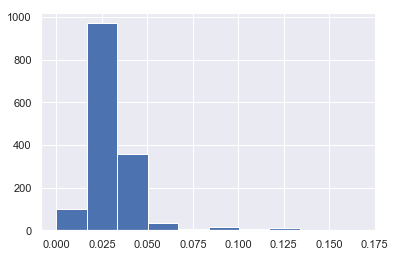

In [86]:
#clustcoca = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv


plt.hist(clustcoca["cost_per_gram"])

In [67]:
#clustcoca

In [68]:

#clustcoca.head()


In [69]:
clustcoca.shape


(1504, 64)

In [70]:
clustcoca.shape

(1504, 64)

## clustering jerarquico 

In [71]:
clustcoca.shape

(1504, 64)

In [72]:
#clustcoca.head()

In [98]:
num_col=clustcoca.select_dtypes(exclude=['object']).columns
print(num_col)
ax = sns.pairplot(clustcoca[num_col])

Index(['Unnamed: 0', 'grams', 'quality', 'btc_price', 'cost_per_gram',
       'cost_per_gram_pure', 'escrow', 'successful_transactions', 'rating',
       'ships_to_US', 'ships_from_US', 'ships_to_NL', 'ships_from_NL',
       'ships_to_FR', 'ships_from_FR', 'ships_to_GB', 'ships_from_GB',
       'ships_to_CA', 'ships_from_CA', 'ships_to_DE', 'ships_from_DE',
       'ships_to_AU', 'ships_from_AU', 'ships_to_EU', 'ships_from_EU',
       'ships_to_ES', 'ships_from_ES', 'ships_to_N. America',
       'ships_from_N. America', 'ships_to_BE', 'ships_from_BE', 'ships_to_WW',
       'ships_from_WW', 'ships_to_SI', 'ships_from_SI', 'ships_to_IT',
       'ships_from_IT', 'ships_to_DK', 'ships_from_DK', 'ships_to_S. America',
       'ships_from_S. America', 'ships_to_CH', 'ships_from_CH', 'ships_to_BR',
       'ships_from_BR', 'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE',
       'ships_from_SE', 'ships_to_CO', 'ships_from_CO', 'ships_to_CN',
       'ships_from_CN', 'ships_to_PL', 'ships_from_PL', '

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

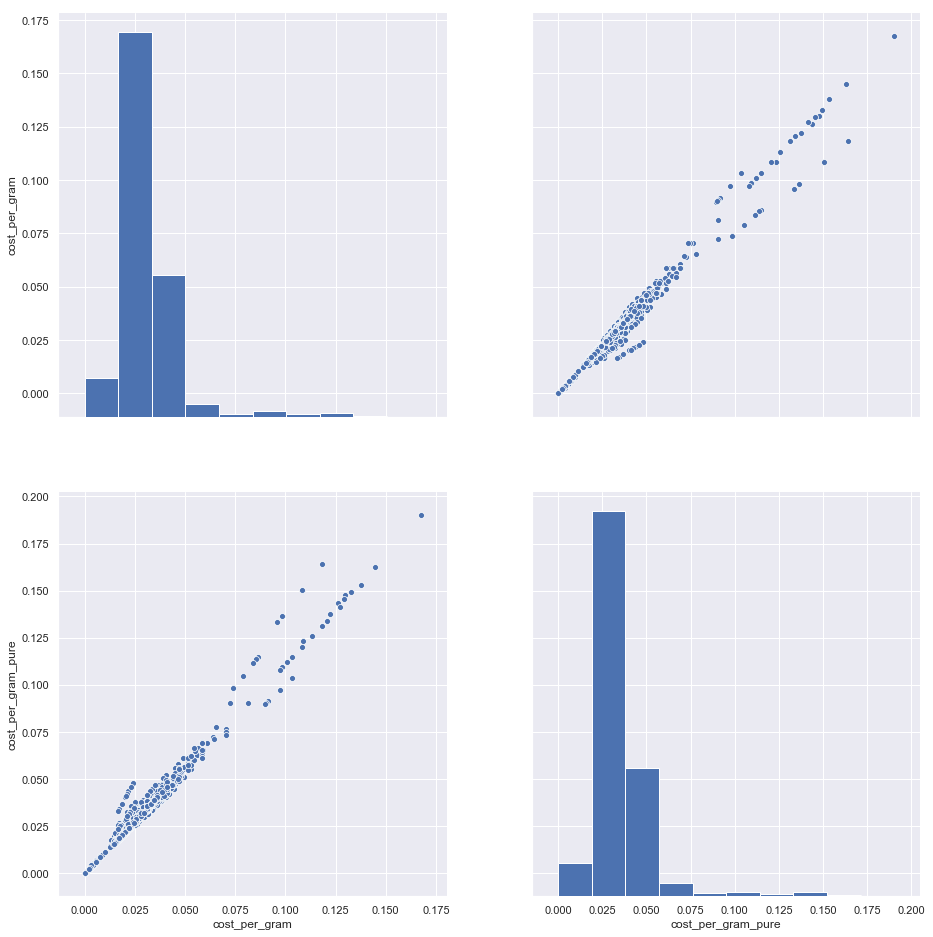

In [35]:

g=sns.pairplot(clustcoca, vars=["cost_per_gram", "cost_per_gram_pure"])
g.fig.set_size_inches(15,15)


In [76]:
clustcoca.corr()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
grams,1.000000,0.030695,0.960451,-0.178628,-0.178273,-0.148276,-0.012006,0.009282
quality,0.030695,1.000000,0.027096,0.082540,-0.064907,0.031008,0.053754,-0.055191
btc_price,0.960451,0.027096,1.000000,-0.171318,-0.170636,-0.159067,-0.008213,0.000539
cost_per_gram,-0.178628,0.082540,-0.171318,1.000000,0.985784,-0.170052,0.063822,0.121977
cost_per_gram_pure,-0.178273,-0.064907,-0.170636,0.985784,1.000000,-0.170629,0.051564,0.126917
escrow,-0.148276,0.031008,-0.159067,-0.170052,-0.170629,1.000000,-0.029527,-0.037400
successful_transactions,-0.012006,0.053754,-0.008213,0.063822,0.051564,-0.029527,1.000000,0.062433
rating,0.009282,-0.055191,0.000539,0.121977,0.126917,-0.037400,0.062433,1.000000


In [77]:
#clustcoca.head()

In [78]:
#clustcoca.head()

In [79]:
#clustcoca.head()

In [80]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
clust=AgglomerativeClustering(n_clusters=3, linkage="ward").fit(clustcoca)

In [ ]:
md=pd.Series(clust.labels_)

In [ ]:
plt.hist(md)
plt.title("histograma de clusters")
plt.xlabel("cluster")
plt.ylabel ("numero de coca cluster")

In [ ]:
clust.children_

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
z=linkage(clustcoca, "ward")

In [ ]:
plt.figure (figsize = (25,10))
plt.title("dendograma de coca")
plt.xlabel("id coca")
plt.ylabel("distancia")
dendrogram(z, leaf_rotation=90.,leaf_font_size=4.)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets


In [ ]:
model =KMeans (n_clusters=3)
model.fit (clustcoca)

In [ ]:
model.labels_

In [ ]:
md_k = pd.Series (model.labels_)
clustcoca2=clustcoca
clustcoca2["clust_her"]=md
clustcoca2["clust_k"]=md_k

In [ ]:
plt.hist(md_k)


In [ ]:
clustcoca2.head()

# interpretacion 

In [ ]:
clustcoca2.groupby("clust_k").mean()